In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style= "whitegrid")

In [20]:
df=pd.read_csv("AIML Dataset.csv")

In [21]:
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [23]:
df.columns


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [24]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [25]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [26]:
df.isnull().sum().sum()

np.int64(0)

In [27]:
df.shape[0]
#(rows, columns)

6362620

In [28]:
round(df["isFraud"].value_counts()[1]/df.shape[0] * 100,2)

np.float64(0.13)

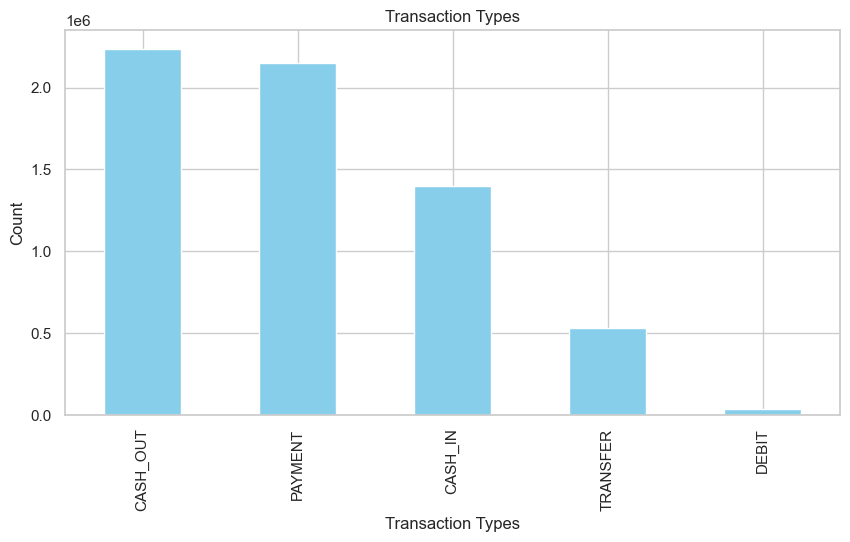

In [29]:
df["type"].value_counts().plot(kind="bar", title= "Transaction Types", figsize=(10,5), color= "skyblue")
plt.xlabel("Transaction Types")
plt.ylabel("Count")
plt.show()

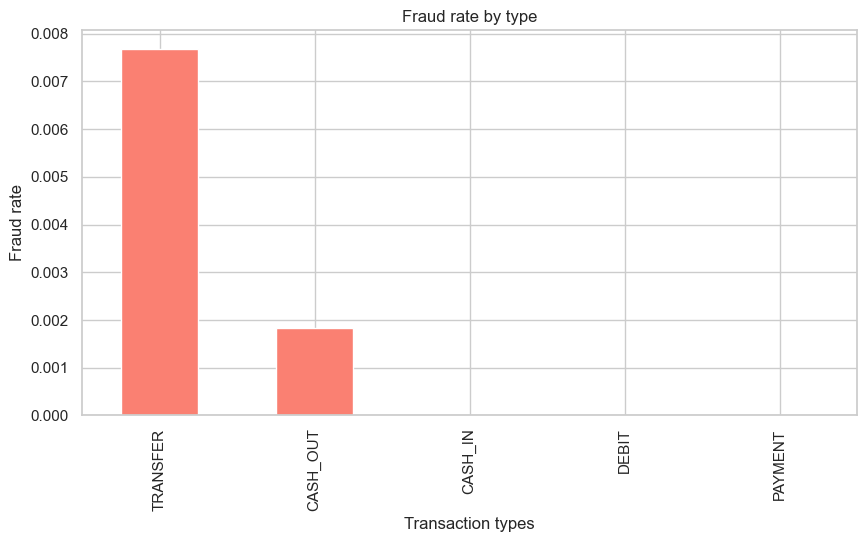

In [30]:
fraud_by_type= df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind= "bar", title= "Fraud rate by type", figsize=(10,5), color= "salmon")
plt.xlabel("Transaction types")
plt.ylabel("Fraud rate")
plt.show()

In [31]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

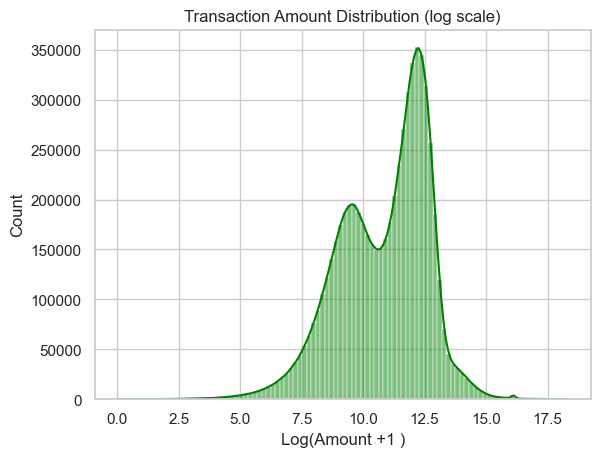

In [32]:
sns.histplot(np.log1p(df["amount"]), bins=100, kde= True, color= "green")
plt.title("Transaction Amount Distribution (log scale)")
plt.xlabel("Log(Amount +1 )")
plt.show()

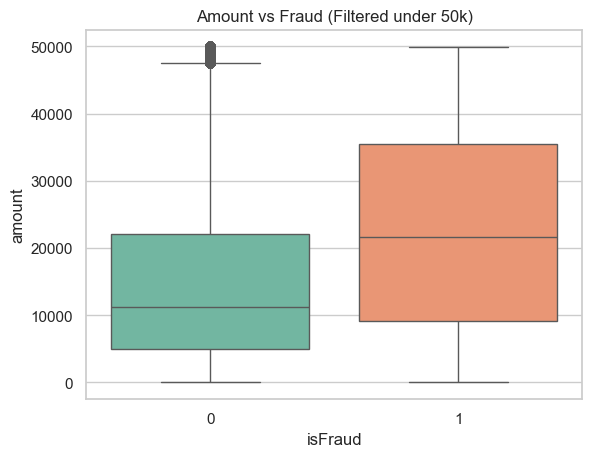

In [33]:
sns.boxplot(data= df[df["amount"]< 50000], x= "isFraud",y= "amount", palette="Set2")
plt.title("Amount vs Fraud (Filtered under 50k)")
plt.show()


In [34]:
df["balanceDiffOrig"]= df["oldbalanceOrg"]- df["newbalanceOrig"]
df["balanceDiffDest"]= df["newbalanceDest"]- df["oldbalanceDest"]


In [35]:
(df["balanceDiffOrig"] < 0).sum()


np.int64(1399253)

In [36]:
(df["balanceDiffDest"] < 0).sum()

np.int64(1238864)

In [37]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


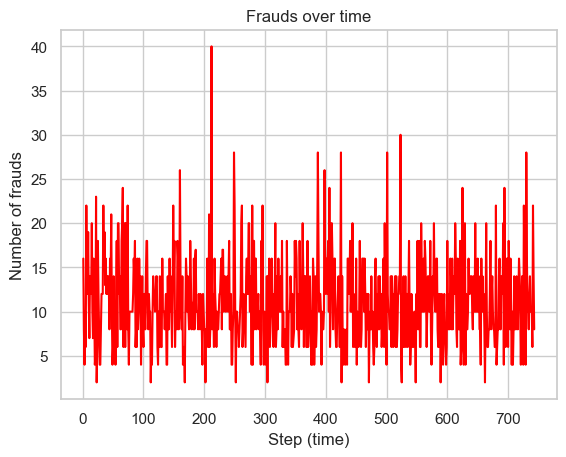

In [38]:
frauds_per_step= df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label= "Frauds per Step", color = "red" )
plt.title("Frauds over time")
plt.xlabel("Step (time)")
plt.ylabel("Number of frauds")
plt.grid(True)
plt.show()

In [39]:
df.drop(columns= "step", inplace= True)


In [40]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [41]:
top_senders= df["nameOrig"].value_counts().head(10)

In [42]:
top_senders

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [43]:
top_receivers= df["nameDest"].value_counts().head(10)

In [44]:
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [45]:
fraud_users= df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)

In [46]:
fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [47]:
fraud_types= df[df["type"].isin(["CASH_OUT", "TRANSFER"])]

In [48]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

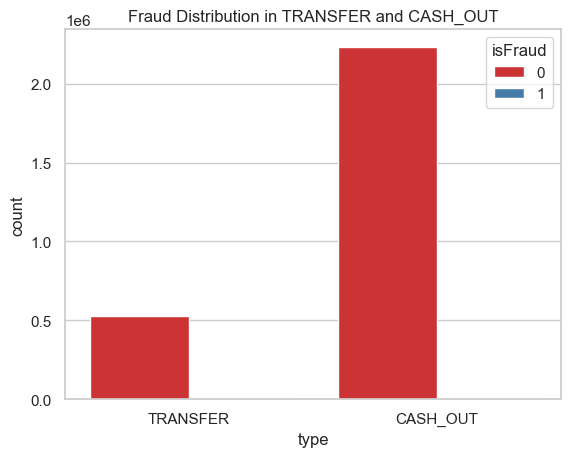

In [49]:
sns.countplot(data=fraud_types, x="type", hue= "isFraud", palette= "Set1")
plt.title("Fraud Distribution in TRANSFER and CASH_OUT")
plt.show()

In [50]:
corr= df[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud"]].corr()  

In [51]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


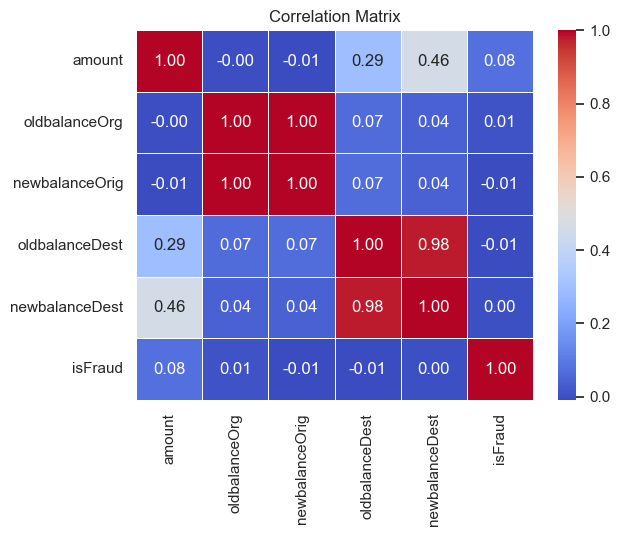

In [52]:
sns.heatmap(corr, annot= True, cmap= "coolwarm", fmt= ".2f", linewidths= .5)
plt.title("Correlation Matrix")
plt.show()

In [53]:
zero_after_transer= df[
    (df["oldbalanceOrg"]>0) &
    (df["newbalanceOrig"]==0)&
    (df["type"].isin(["TRANSFER", "CASH_OUT"]))

]

In [54]:
len(zero_after_transer)

1188074

In [55]:
zero_after_transer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [56]:
df["isFraud"].value_counts()


isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [58]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [59]:
df_model=df.drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis=1)

In [60]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [61]:
categorical= ["type"]
numeric= ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]
  


In [62]:
y= df_model["isFraud"]
X= df_model.drop("isFraud", axis=1)

In [63]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=.3, stratify=y)

In [64]:
preprocessor = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(drop="first"), categorical)
    ],
    remainder="drop"
)

In [65]:
pipeline= Pipeline(
    [
        ("prep", preprocessor),
        ("clf", LogisticRegression(class_weight="balanced", max_iter= 1000))
    ]
)

In [66]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [67]:
y_prediction= pipeline.predict(X_test)

In [68]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.95      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.95      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [69]:
confusion_matrix(y_test, y_prediction)

array([[1804022,  102300],
       [    132,    2332]])

In [70]:
pipeline.score(X_test, y_test) * 100


94.63365720410775

In [71]:
import joblib
joblib.dump(pipeline, "fraud_detection_model.pkl")


['fraud_detection_model.pkl']

In [72]:
features = [
    "type", "amount", "oldbalanceOrg", "newbalanceOrig",
    "oldbalanceDest", "newbalanceDest", "balanceDiffOrig", "balanceDiffDest"
]
X = df[features]
y = df["isFraud"]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)


In [74]:
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), [
        "amount", "oldbalanceOrg", "newbalanceOrig",
        "oldbalanceDest", "newbalanceDest", "balanceDiffOrig", "balanceDiffDest"
    ]),
    ("cat", OneHotEncoder(drop="first"), ["type"])
])




In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
pipeline = Pipeline(steps=[
    ("prep", preprocessor),
    ("clf", LogisticRegression(class_weight="balanced", max_iter=1000))
])


In [77]:
pipeline.fit(X_train, y_train)
joblib.dump(pipeline, "fraud_detection_model_improved.pkl")


['fraud_detection_model_improved.pkl']

In [78]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [79]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

In [80]:
# Classification metrics
print("📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Fraud", "Fraud"]))

📊 Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      0.95      0.97   1588602
       Fraud       0.02      0.94      0.04      2053

    accuracy                           0.95   1590655
   macro avg       0.51      0.94      0.51   1590655
weighted avg       1.00      0.95      0.97   1590655



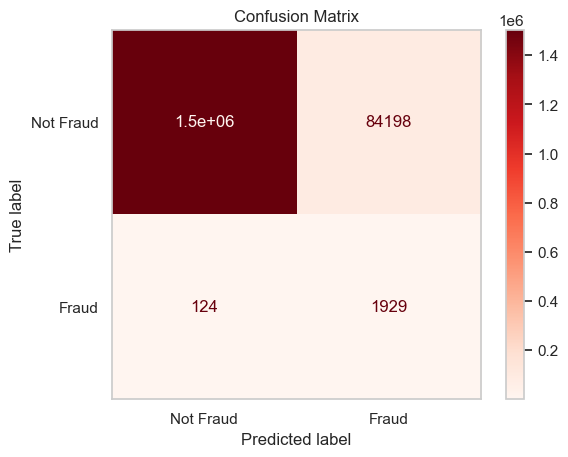

In [81]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])
disp.plot(cmap="Reds")
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [82]:
from sklearn.metrics import roc_auc_score

In [83]:
y_probs = pipeline.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print(f"🔵 ROC AUC Score: {roc_auc:.3f}")

🔵 ROC AUC Score: 0.990


In [84]:
print(df["isFraud"].value_counts(normalize=True))


isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


In [85]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Not Fraud", "Fraud"]))


              precision    recall  f1-score   support

   Not Fraud       1.00      0.95      0.97   1588602
       Fraud       0.02      0.94      0.04      2053

    accuracy                           0.95   1590655
   macro avg       0.51      0.94      0.51   1590655
weighted avg       1.00      0.95      0.97   1590655



In [86]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

In [87]:
np.random.seed(42)
possible_countries = ["US", "GB", "FR", "DE", "IN", "CN", "NG", "RU", "BR", "ZA"]
df["country_code"] = np.random.choice(possible_countries, size=len(df))


In [88]:
high_risk_countries = ["NG", "RU", "CN"]
df["isHighRiskCountry"] = df["country_code"].isin(high_risk_countries).astype(int)

In [89]:
# Balance the dataset
fraud_df = df[df["isFraud"] == 1]
non_fraud_df = df[df["isFraud"] == 0].sample(n=100000, random_state=42)
df_balanced = pd.concat([fraud_df, non_fraud_df])

In [90]:
# Feature engineering
df_balanced["balanceDiffOrig"] = df_balanced["oldbalanceOrg"] - df_balanced["newbalanceOrig"]
df_balanced["balanceDiffDest"] = df_balanced["newbalanceDest"] - df_balanced["oldbalanceDest"]

In [91]:
features = [
    "type", "amount", "oldbalanceOrg", "newbalanceOrig",
    "oldbalanceDest", "newbalanceDest", "balanceDiffOrig", "balanceDiffDest", "isHighRiskCountry"
]


In [92]:
X = df_balanced[features]
y = df_balanced["isFraud"]

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

In [94]:
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), [
        "amount", "oldbalanceOrg", "newbalanceOrig",
        "oldbalanceDest", "newbalanceDest", "balanceDiffOrig", "balanceDiffDest", "isHighRiskCountry"
    ]),
    ("cat", OneHotEncoder(drop="first"), ["type"])
])

In [95]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

In [96]:
pipeline = Pipeline(steps=[
    ("prep", preprocessor),
    ("clf", rf_model)
])

In [97]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest',
                                                   'balanceDiffOrig',
                                                   'balanceDiffDest',
                                                   'isHighRiskCountry']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=15,
                                        n_jobs=-1, random_state=42))])

In [98]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
import matplotlib.pyplot as plt

In [99]:
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

In [100]:
print("📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Fraud", "Fraud"]))

📊 Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     25001
       Fraud       0.96      0.98      0.97      2053

    accuracy                           1.00     27054
   macro avg       0.98      0.99      0.98     27054
weighted avg       1.00      1.00      1.00     27054



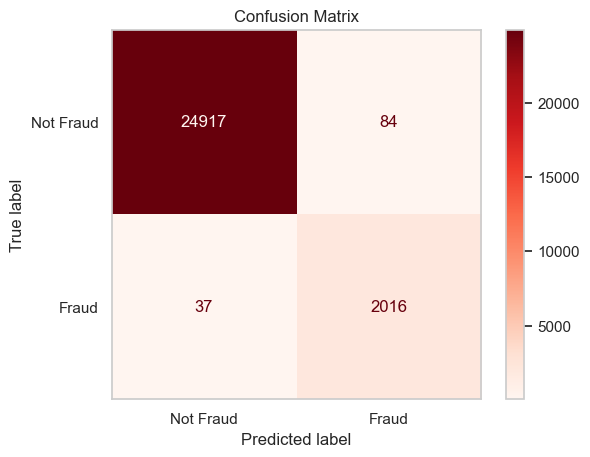

In [101]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])
disp.plot(cmap="Reds")
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


In [102]:
roc_auc = roc_auc_score(y_test, y_proba)
print(f"🔵 ROC AUC Score: {roc_auc:.3f}")

🔵 ROC AUC Score: 0.999


In [103]:
import joblib
joblib.dump(pipeline, "fraud_detection_model.pkl")


['fraud_detection_model.pkl']